In [1]:
import fastai
from fastai.vision import *
from fastai.widgets import *
from fastai.callbacks import *
from fastai.vision.gan import *

from fastai.metrics import accuracy_thresh, top_k_accuracy, error_rate, FBeta, root_mean_squared_error, mean_squared_error, mean_absolute_error

from torchvision.models import vgg16_bn

In [2]:
print(fastai.__version__)

1.0.54.dev0


In [8]:
path = Path('./data/CATS_DOGS')

In [9]:
tfms = get_transforms(do_flip=True, flip_vert=True, max_rotate=0.77, max_zoom=1.07,
                   max_lighting=0.2, max_warp=0.2, p_affine=0.2,
                   p_lighting=0.2, xtra_tfms=None)

In [10]:
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, bs=32, size=228)
data.normalize(imagenet_stats)

c:\pillview\nih\fastai\fastai\data_block.py:454: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


ImageDataBunch;

Train: LabelList (18743 items)
x: ImageList
Image (3, 228, 228),Image (3, 228, 228),Image (3, 228, 228),Image (3, 228, 228),Image (3, 228, 228)
y: CategoryList
CAT,CAT,CAT,CAT,CAT
Path: data\CATS_DOGS;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data\CATS_DOGS;

Test: None

In [11]:
learn = cnn_learner(data, models.resnet34, pretrained=True, metrics=[accuracy], callback_fns=ShowGraph)

In [12]:
learn.fit_one_cycle(7)

In [13]:
learn.save('pets_test')

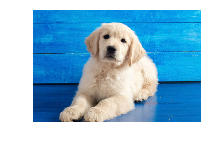

In [47]:
#Test image one
img_path_one = './data/CATS_DOGS/test3.jpg'
img = open_image(img_path_one)
img.show()

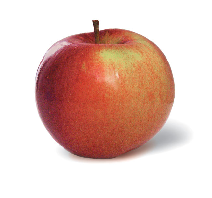

In [48]:
#Test image two
img_path = './data/CATS_DOGS/test6.jpg'
img = open_image(img_path)
img.show()

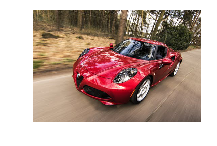

In [60]:
#Test image three
img_path_two = './data/CATS_DOGS/test4.jpeg'
img = open_image(img_path_two)
img.show()

In [56]:
def dog_cat(img_path):
    
    img = open_image(img_path)
    
    prediction, indice, losses = learn.predict(img)

    #Calculate propabilities
    preds_sorted, idxs = losses.sort(descending=True)
    pred_1_prob = np.round(100*preds_sorted[0].item(),2)

    if pred_1_prob <= 90:
        result = (f' Model IS NOT Confident: Highest Probability: ({pred_1_prob}%)')
        img.show()
    else:
        result = (f' Model IS confident: ({pred_1_prob}%) Prediction: {prediction}')
        img.show()
    
    return result

' Model IS NOT Confident: Highest Probability: (69.98%)'

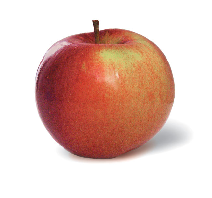

In [57]:
dog_cat(img_path)

' Model IS confident: (99.99%) Prediction: DOG'

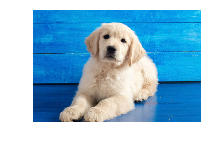

In [58]:
dog_cat(img_path_one)

' Model IS NOT Confident: Highest Probability: (88.35%)'

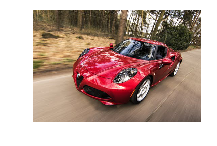

In [61]:
#Bearing in mind that if the threshold had been decreased from 90 to 80 this image would have been classified as a...
dog_cat(img_path_two)

In [62]:
def dog_cat(img_path):
    
    img = open_image(img_path)
    
    prediction, indice, losses = learn.predict(img)

    #Calculate propabilities
    preds_sorted, idxs = losses.sort(descending=True)
    pred_1_prob = np.round(100*preds_sorted[0].item(),2)

    if pred_1_prob <= 80:#change threshold
        result = (f' Model IS NOT Confident: Highest Probability: ({pred_1_prob}%)')
        img.show()
    else:
        result = (f' Model IS confident: ({pred_1_prob}%) Prediction: {prediction}')
        img.show()
    
    return result

' Model IS confident: (88.35%) Prediction: DOG'

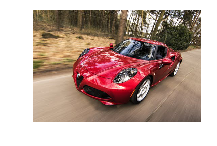

In [63]:
dog_cat(img_path_two) #which is wrong